In [80]:
#!pip install tensorflow

In [81]:
# Tensorflow and Scikit-Learn packages
import tensorflow as tf
from sklearn.metrics import r2_score

#Computational and Visualisation packages
import numpy as np
import pandas as pd

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [82]:
housing_dataset = pd.read_csv("cal_housing_data with headers.csv")
housing_dataset.info()
print("\n Glimpse of the housing dataset")
housing_dataset.head()
print (min(housing_dataset['Longitude']))
print (min(housing_dataset['Latitude']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
Longitude            20640 non-null float64
Latitude             20640 non-null float64
HousingMedianAge     20640 non-null int64
TotalRooms           20640 non-null int64
TotalBedrooms        20640 non-null int64
Population           20640 non-null int64
Households           20640 non-null int64
MedianIncomeValue    20640 non-null float64
MedianHouseValue     20640 non-null int64
dtypes: float64(3), int64(6)
memory usage: 1.4 MB

 Glimpse of the housing dataset
-124.35
32.54


In [83]:
housing_geo = housing_dataset[['Population', 'Latitude', 'Longitude']]
housing_geo.columns = ['Population','Lat','Long']  
housing_geo = housing_geo.convert_objects(convert_numeric=True) 

lat=[]  
for x in housing_geo['Lat'][1:20640]: lat.append(x)
    
long=[]
for x in housing_geo['Long'][1:20640]: long.append(x)  

In [84]:
# Geographical plot from the housing dataset
map = Basemap(projection='robin', resolution = 'c',  
              area_thresh = 1000.0,lat_0=32.54, lon_0=-124.35)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'gray')
map.drawmapboundary()

x,y = map(long, lat)

map.plot(x, y, 'ro', markersize=6) 

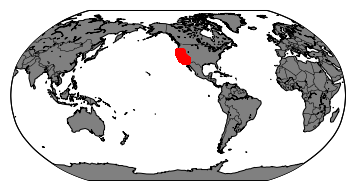

In [85]:
plt.show()

In [86]:
# Preprocessing
housing_array = np.array([x for x in housing_dataset.values])

housing_dependent = np.delete(housing_array, 8, axis=1)
housing_target = np.delete(housing_array, slice(0, 8), axis=1)

m, n = housing_dependent.shape
housing_dependent_plus_bias = np.c_[np.ones((m, 1)), housing_dependent]

In [87]:
# Calculating the compute graphs
X = tf.constant(housing_dependent_plus_bias, dtype=tf.float64, name="X")
XT = tf.transpose(X)
y = tf.constant(housing_target.reshape(-1, 1), dtype=tf.float64, name="y")

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

In [88]:
with tf.Session() as sess:
    theta_value = theta.eval()
    
print (theta_value)

[[ -3.59402294e+06]
 [ -4.28237438e+04]
 [ -4.25767219e+04]
 [  1.15630387e+03]
 [ -8.18164928e+00]
 [  1.13410689e+02]
 [ -3.85350953e+01]
 [  4.83082868e+01]
 [  4.02485142e+04]]


In [89]:
predicted_value = theta_value[0][0]
#Feature coefficients
coefficients = theta_value[1:]

for j, c in enumerate(coefficients):
    predicted_value += c[0] * housing_dependent[0][j]
print ("Predicted value from the model = {}".format(predicted_value))

Predicted value from the model = 411111.096064


## Computation of the quality of the trained model

In [90]:
predicted_values = np.full((m), theta_value[0][0])
coefficients = theta_value[1:] #Extracting the feature coefficients

for i, x in enumerate(housing_dependent):
    for j, c in enumerate(coefficients):
        predicted_values[i] += c * x[j]

print ("Array of computed predictions = {}".format(predicted_values))

Array of computed predictions = [ 411111.09606391  416144.49078587  380432.65417419 ...,   25026.16974242
   37991.19625315   55550.98309296]


In [91]:
# Flattening the dependent variable
y_flattened = np.ndarray.flatten(housing_target)
print (y_flattened)

[ 452600.  358500.  352100. ...,   92300.   84700.   89400.]


### Computation of the R squared

In [92]:
R_2 = r2_score(y_flattened, predicted_values)
print ("Computed R^2 = %.10f" % R_2)

Computed R^2 = 0.6371056229


### Computation of the residual

In [94]:
residual = 0.0
for i, f_i in enumerate(predicted_values):
    diff = float(f_i - y_flattened[i])
    residual += (diff * diff)
print ("Computed Residual = %.10f" % residual)

Computed Residual = 99734980886003.9375000000
